# Assignment 4

## Gender Recognition by Voice

### In order to use later in the project, there is a need to import compulsory libraries; Scikit-learn, Seaborn, Pandas

In [15]:
# Regular EDA and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For plots to appear in the notebook
%matplotlib inline
# Model implementation
from sklearn.model_selection import train_test_split
# Model development
from sklearn.neighbors import KNeighborsClassifier
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option("display.max_columns", None)

## I take advantage of KNN for the model development

## First and foremost, I am getting insight on the dataset by following cells

In [2]:
# importing the dataset
df = pd.read_csv('voice.csv')

In [3]:
# Shape of the dataset
df.shape

(3168, 21)

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
# Is there any missing values?
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [12]:
# Overview of the statistical summary of each attribute
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [10]:
# Replacing the Boolean Label column with numerical input
df.replace(to_replace="male", value=1, inplace=True)
df.replace(to_replace="female", value=0, inplace=True)
df.label.unique()

array([1, 0], dtype=int64)

In [11]:
df.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
538,0.148505,0.093163,0.172496,0.085515,0.225596,0.140081,32.350739,1122.219023,0.853311,0.482367,...,0.148505,0.078180,0.015936,0.258065,0.007812,0.007812,0.007812,0.000000,0.000000,1
2039,0.180186,0.046692,0.177439,0.163931,0.204622,0.040691,2.946759,14.328269,0.898185,0.389866,...,0.180186,0.146992,0.016080,0.258065,1.797883,0.203125,7.000000,6.796875,0.237233,0
1650,0.116213,0.085195,0.091020,0.040038,0.192450,0.152412,1.307300,4.809448,0.966363,0.763436,...,0.116213,0.182847,0.026273,0.253968,0.279605,0.015625,0.742188,0.726562,0.505974,0
462,0.150227,0.071960,0.134344,0.099714,0.216134,0.116420,2.295309,12.157235,0.963545,0.736460,...,0.150227,0.112769,0.015640,0.275862,0.089732,0.007812,0.257812,0.250000,0.154095,1
466,0.183967,0.047837,0.186222,0.144172,0.223933,0.079762,1.620491,5.719073,0.904728,0.153505,...,0.183967,0.108979,0.019277,0.275862,0.620605,0.140625,4.679688,4.539062,0.029506,1


In [16]:
# Plotting the correlation matrix table to choose the 7 strongest features correlated to the output
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


# I opted for these columns as are greatly contributors to the prediction, in a negative or positive way

## Columns number: 1, 2, 4, 6, 9, 10, and 13

# 2) Data Cleaning

## As we dicovered earlier, there is no null value in the dataset, and cleaning is no longer is used

## Let's create a new dataset with the strongest attributes along with the label column

In [18]:
updated_df = df[['meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'meanfun', 'label']]

In [19]:
updated_df

,meanfreq,sd,Q25,IQR,sp.ent,sfm,meanfun,label
0,0.059781,0.064241,0.015071,0.075122,0.893369,0.491918,0.084279,1
1,0.066009,0.067310,0.019414,0.073252,0.892193,0.513724,0.107937,1
2,0.077316,0.083829,0.008701,0.123207,0.846389,0.478905,0.098706,1
3,0.151228,0.072111,0.096582,0.111374,0.963322,0.727232,0.088965,1
4,0.135120,0.079146,0.078720,0.127325,0.971955,0.783568,0.106398,1
...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.049285,0.151859,0.962934,0.763182,0.182790,0
3164,0.116221,0.089221,0.042718,0.162193,0.960716,0.709570,0.188980,0
3165,0.142056,0.095798,0.033424,0.190936,0.946854,0.654196,0.209918,0
3166,0.143659,0.090628,0.043508,0.176435,0.950436,0.675470,0.172375,0


# Exploratory Data Analysis (EDA)

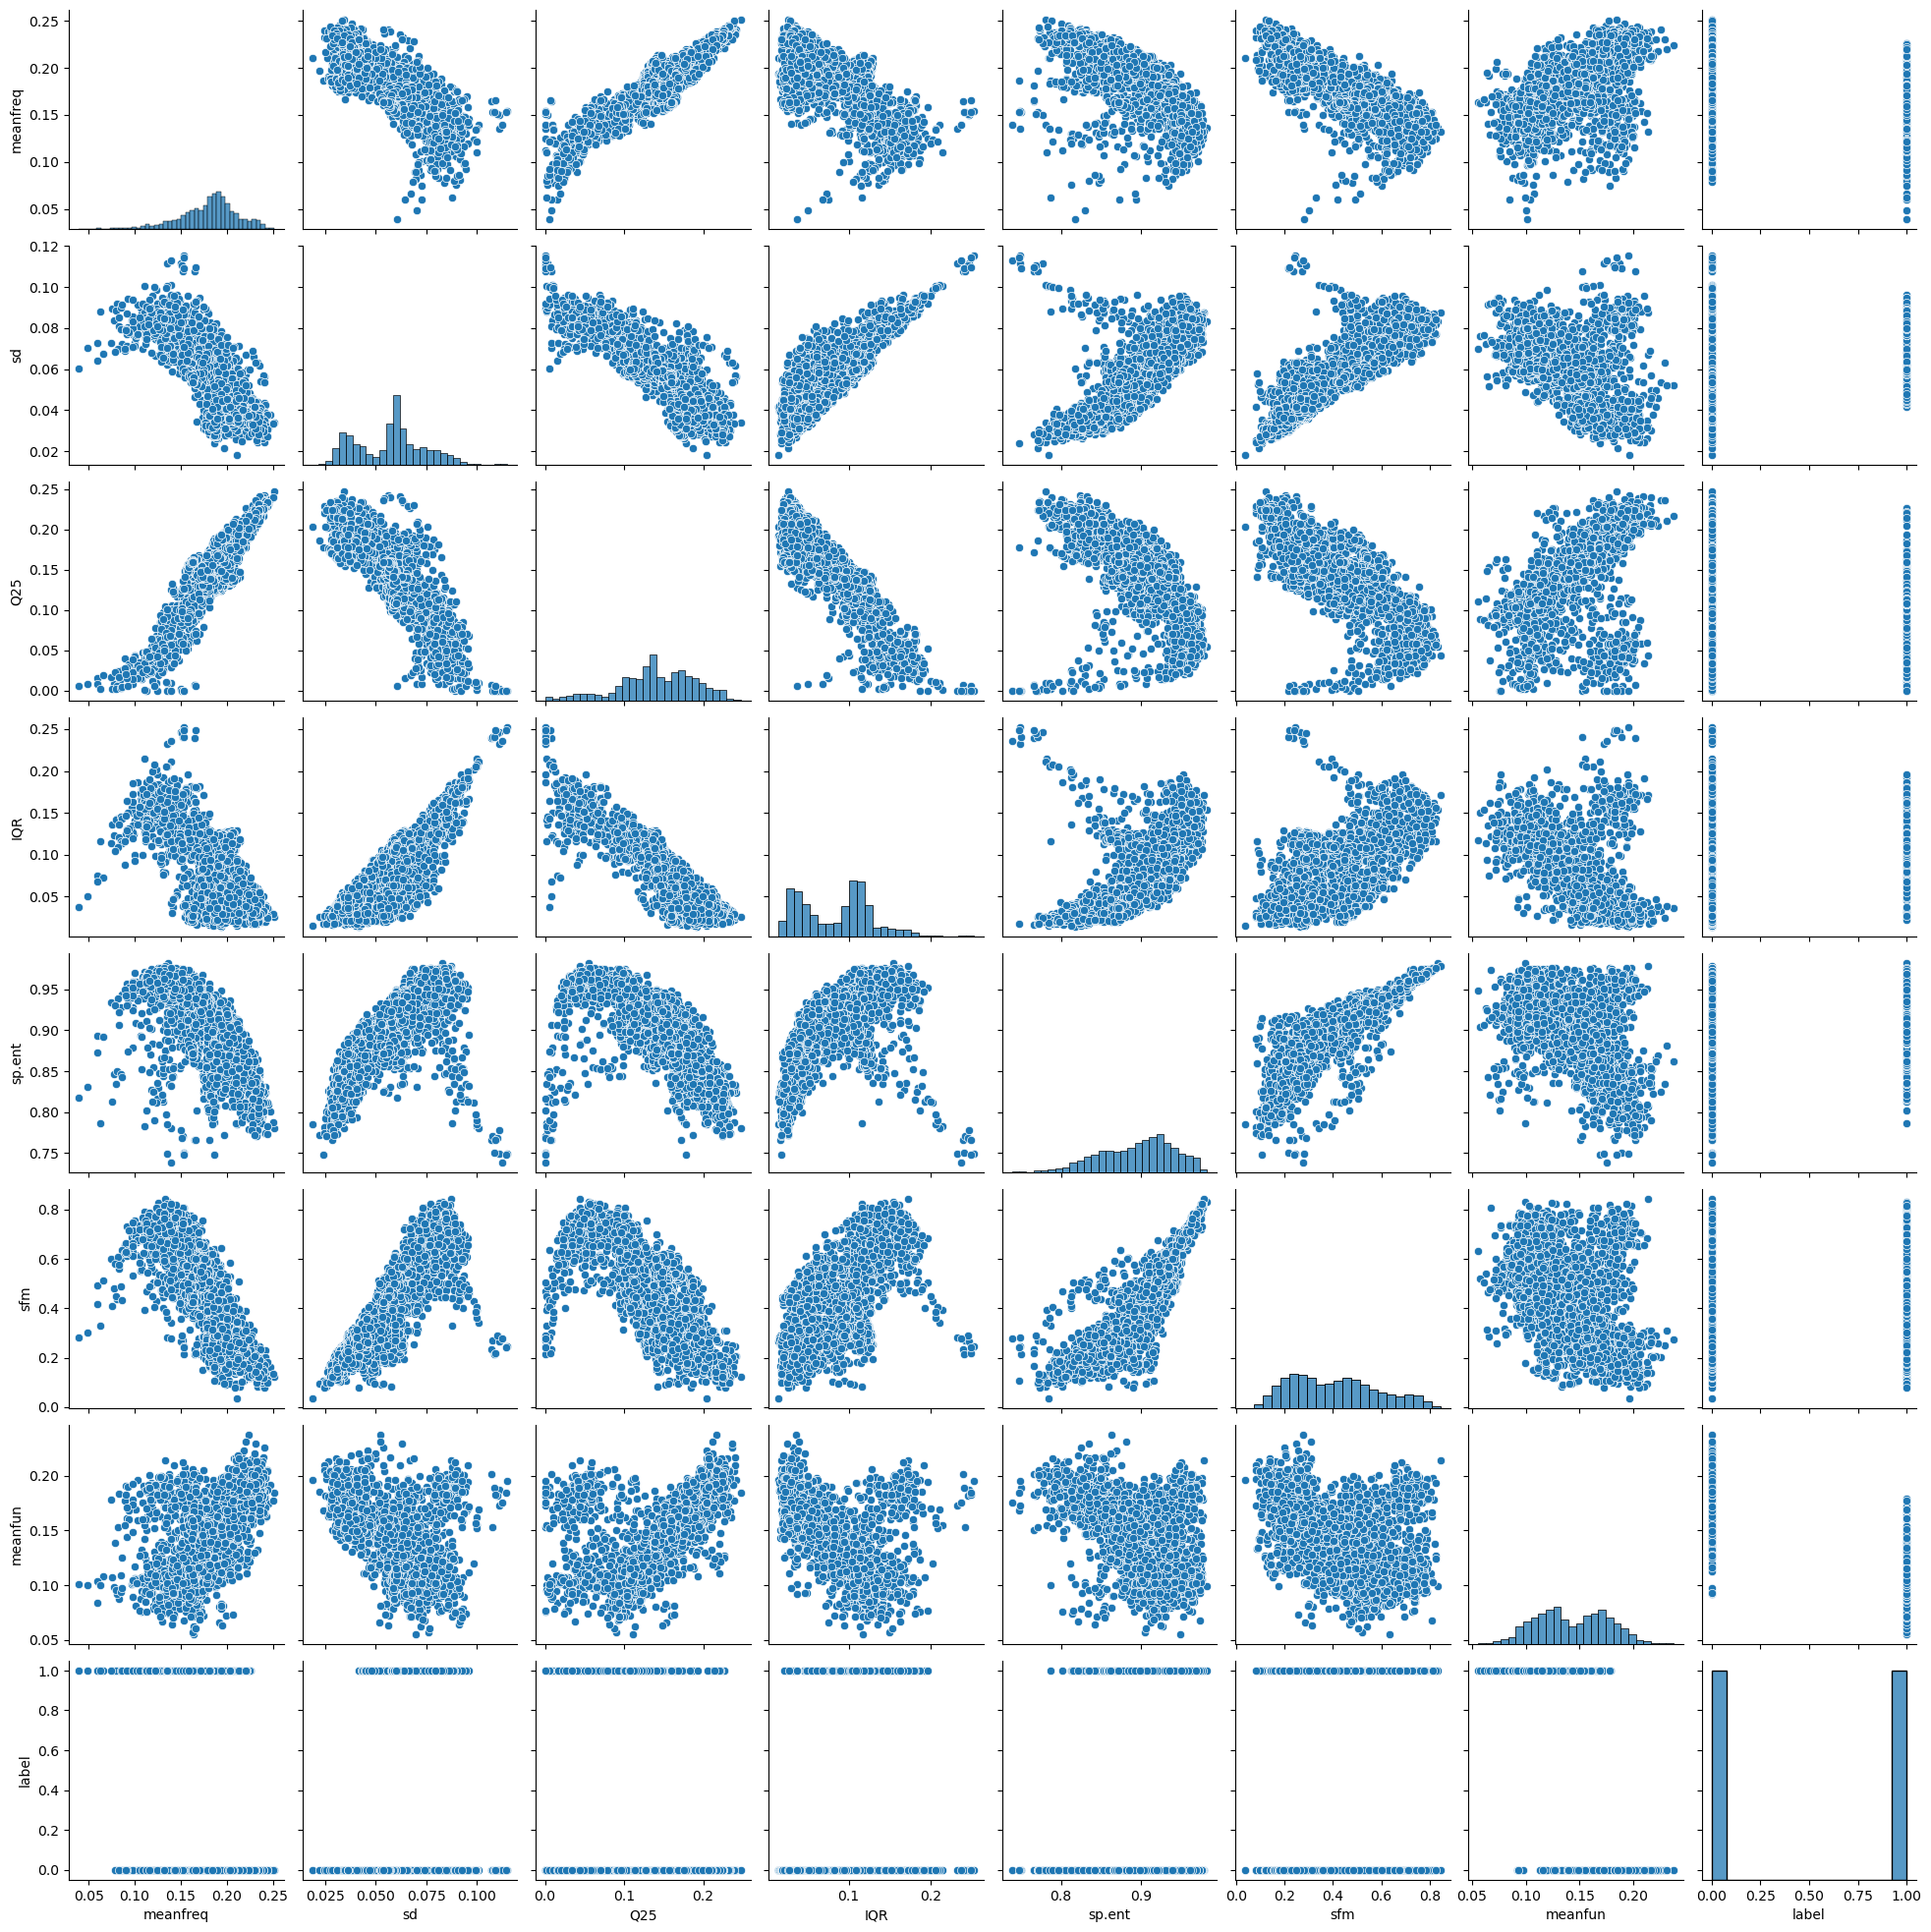

In [20]:
sns.pairplot(updated_df)
plt.show()

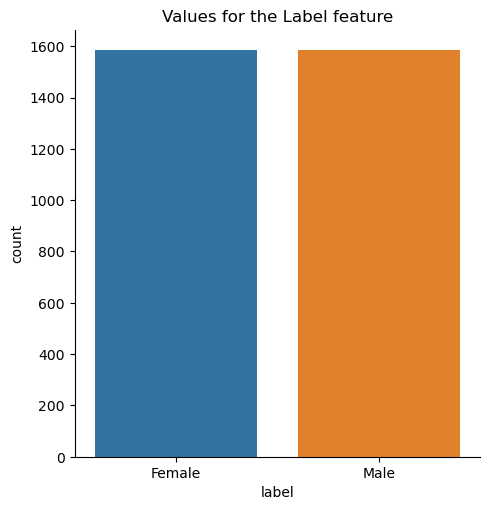

In [21]:
sns.catplot(data=df, x='label', kind='count')
plt.title("Values for the Label feature")
LABELS = ['Female', 'Male']
plt.xticks(range(2), LABELS)
plt.show()

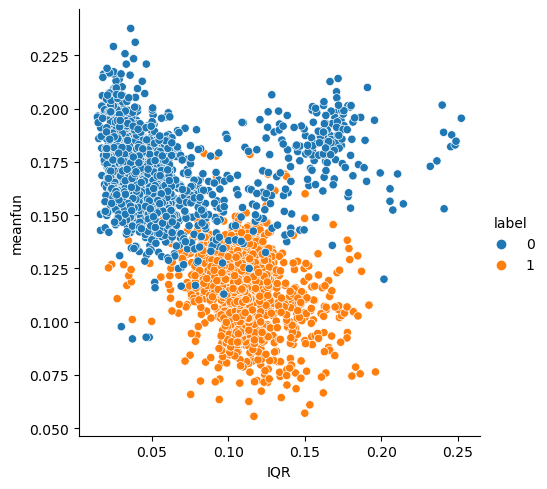

In [23]:
sns.relplot(data=df, x='IQR', y='meanfun', hue='label')

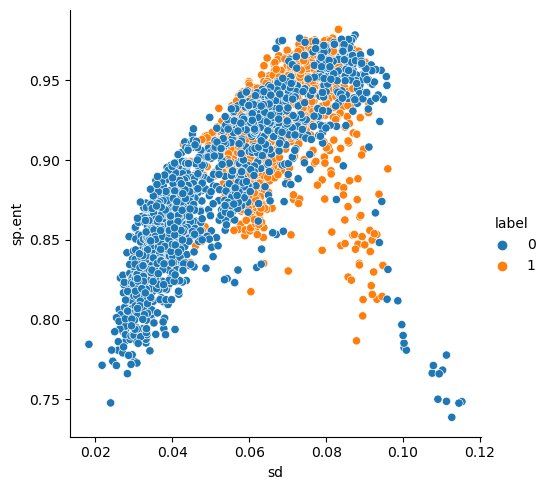

In [24]:
sns.relplot(data=df, x='sd', y='sp.ent', hue='label')

# Assignment 5 : Model and Evaluation

## Predictive Model Development (PMD)

In [41]:
X = df.drop(['label'], axis=1) #create the X matrix

y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #split the data to use for training and testing

In [42]:
X_train.shape, y_train.shape

((2376, 20), (2376,))

In [48]:
knn = KNeighborsClassifier() # create a KNN-classifier with the default number of n_neighbors
knn = knn.fit(X_train, y_train) # this fits the k-nearest neigbor model with the train data

In [49]:
knn.score(X_test, y_test) # calculate the accuracy score on the test dataset

C:\Users\mjghc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.696969696969697

## We got ~`70%` accuracy

C:\Users\mjghc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'KNN Confusion Matrix')

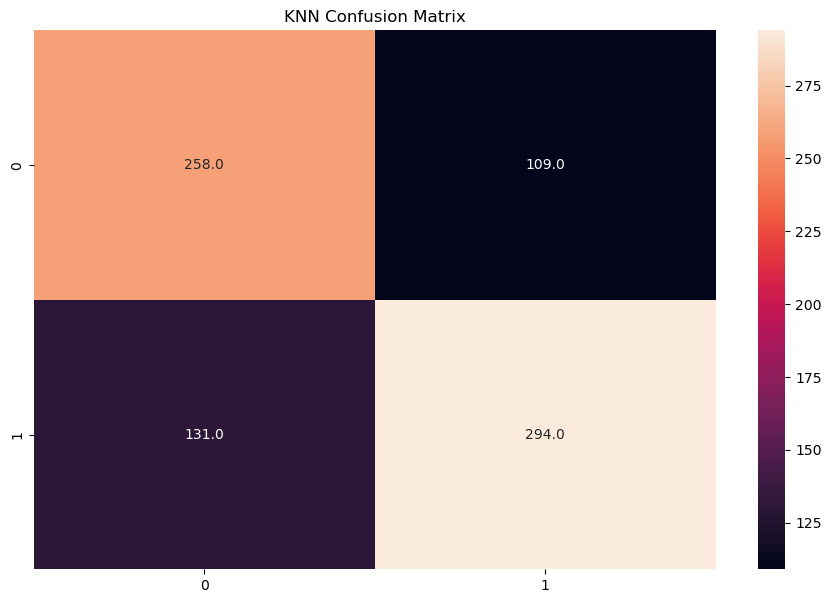

In [50]:
y_test_pred = knn.predict(X_test) # the predicted values
plt.figure(figsize=(11, 7))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="0.1f")
plt.title("KNN Confusion Matrix")

# Creating the classification report to see the precision, recall, and f1_score

In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       367
           1       0.73      0.69      0.71       425

    accuracy                           0.70       792
   macro avg       0.70      0.70      0.70       792
weighted avg       0.70      0.70      0.70       792

